<a href="https://colab.research.google.com/github/gabrielsuper/projetosdata/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**

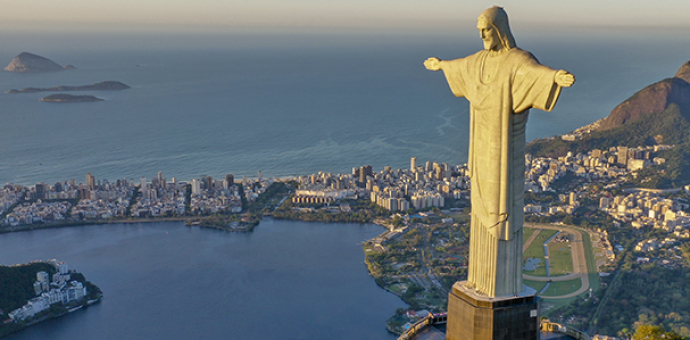

Rio de Janeiro, uma das capitais mais conhecidas no Brasil, famosa por suas belezas, palco de filmes e novelas, possuindo uma das 7 maravilhas do mundo, o Cristo Redentor.

Um dos problemas que atinge todas as cidades no Brasil é a violência que a cada dia parece ganhar mais repercussão nos noticiários.

Além de possuirmos os jornais locais que disponibilizam matérias sobre os acontecimentos na cidade, os orgãos públicos atráves das leis de informações vem disponibilizando dados de várias fontes, o que possibilita realizar análises estatisticas.

Por exemplo na cidade do Rio de Janeiro existe o projeto da [ISP Dados](http://www.isp.rj.gov.br/). Faremos uma análise em cima desses indicadores e dados explorando o arquivo e as variáveis estatisticas de violência do Rio de Janeiro.

##Obtenção dos Dados

Os dados aqui apresentados foram obtidos do [Portal ISP Dados](http://www.isp.rj.gov.br/), que é uma página de dados estatisticos do Instituto de Segurança público da cidade do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/gabrielsuper/projetosdata/main/pasta/violencia_rio.csv).

### Importando os Dados

Utilizaremos a biblioteca Pandas para realizar exploração dos dados obtidos no arquivo csv. Com isso poderemos ter algumas noções a cerca do dataframe.

In [ ]:
# importar os pacotes necessários

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gabrielsuper/projetosdata/main/pasta/violencia_rio.csv')

## Análise Inicial dos Dados

Antes de começarmos a manipular o dataframe é importante verificar a consistência das informações e com o que estamos lidando. Como por exemplo responder algumas perguntas a cerca de quantidade e tipos das variáveis.

Vamos começar entendendo a dimensão do nosso dataframe.

In [ ]:
# verificar a dimensão do dataframe

print('Variáveis:',df.shape[1])
print('Entradas:',df.shape[0])

Variáveis: 56
Entradas: 344


Agora vamos apresentar quais os nomes dessas variáveis para podermos ter uma noção melhor.

In [ ]:
# imprimir o nome das colunas

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Sabendo o nome das colunas, vamos agora imprimir o tipo de colunas. Isso vai dar um norte melhor no tipo de dados que vamos ter que manipular e vai ajudar na etapa da limpeza de dados.

In [ ]:
# imprimir o tipo dessas variáveis

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Após visualizarmos as variáveis que possuímos no dataframe, da para ter uma ideia que todos os dados são no formato *int* ou *float*, ou seja no formato númerico.

Agora vamos utilizar o comando `head`, para termos uma visualização das 5 primeiras entradas do nosso arquivo.

In [ ]:
# ver as 5 primeiras entradas

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É possível notar que os dados obtidos possuem muitas entradas ausentes, o que pode dificultar algumas análises. Vamos mais para frente verificarmos uma forma de lidar com esse problema, entretanto vamos questionar esse dataset com apenas essas 5 entradas.

* Os dados iniciais são do ano de 1991 e alguns destes crimes podem ter deixado de ser contabilizados por não haver o registro de forma adequada, o que não significa que não ocorreram. Logo mais vamos ver uma forma de contorna esse problema.

* Infelizmente se tratando do Brasil, não tinhamos um cuidado com a cultura dos dados naquela época, apesar de hoje em dia isso estar mudando. Levando em consideração o tempo em que foi inciado será que o registro destes dados foram feitos de forma digitalizada? Possívelmente o gerenciamento destas informações podem ter sido feito de forma falha, de forma manual em papeis que devem ter sido perdidas com o tempo.

Antes de decidirmos o que fazer com os dados ausentes, vamos verificar a relação deles em totalidade no dataset.



In [ ]:
# verificando os dados ausentes

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)



## Informações Estatísticas da Violência no Rio de Janeiro

Nessa etapa utilizaresmo o comando `describe()`, nele podemos ter um overview de forma mais clara sobre alguns dados estatísticos das nossas variáveis. Como por exemplo:

* Entender melhor a distribuição dos dados;
* Identificar a falha na distribuição dos dados;
* Identificar outliers;
* Após realizar a limpeza de dados, realizar um comparativo da eficácia antes e depois da tratativa.

In [ ]:
# Realizar a impressão dos dados estátisticos do dataframe

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio - Veículos

Nessa etapa vamos dedicar a verificar os dados relacionados aos crimes de roube e furto de veículos.

Um problema muito comum nas cidades Brasileiras e como possuímos informações no arquivo referente a esse tema, vamos averiguar os valores para encontrar resultados pertinentes a essa situação e ao combate desse tipo de crime.

In [ ]:
# Ver a média da variável roubo_veiculo

mean_roubo_veiculo = df.roubo_veiculo.mean()

print(round(mean_roubo_veiculo,2))

2448.7


Acima, podemos verificar que a média da variável roubo de veículos é de 2448.7 veículos por mês.

In [ ]:
# Ver a média da variável furto_veiculo

mean_furto_veiculo = df.furto_veiculos.mean()

print(round(mean_furto_veiculo,2))

1674.67


Referente ao furto de veiculos temos uma media menor em relação ao roubo, entretanto é uma média de 1674,67 furtos por mês.

In [ ]:
# Ver a média da recuperacao_veiculos

mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

# Total de veículos perdidos

total = mean_roubo_veiculo + mean_furto_veiculo

print("Média de Veículos Perdidos por Mês: {:.2f} ".format(total))
print("Média de Veículos Recuperados por Mês: {:.2f} ".format(mean_recuperacao_veiculos))

# Porcentagem de Veículos Recuperados

pct = mean_recuperacao_veiculos/total * 100

print('{:.2f}% dos veículos roubados ou furtados são recuperados'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Média de Veículos Recuperados por Mês: 1772.24 
42.98% dos veículos roubados ou furtados são recuperados


### Crimes Contra a Vida

Agora vamos analisar o máximo e o mínimo da variável `hom_doloso` que foi registrado ao longo do período no dataset.

In [ ]:
# Máximo e mínimo da variável hom_doloso

max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# Imprimir os valores máx e min

print('Mín:\t{}'.format(min_hom_doloso))
print('Máx:\t{}'.format(max_hom_doloso))


Mín:	272
Máx:	831


Podemos ver que em um determinado mês o mínimo já registrado foi 272 homícidios dolosos.

Já o mês com o número mais elevado chegou a 831 homícidios dolosos.

Vamos investigar um pouco mais esses valores apresentados.


In [ ]:
# verificar o mês com o menor número de homícidios dolosos

df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# verificar o mês com o maior número de homícidios dolosos

df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Analisando os valores mínimos e máximos podemos observar que o menor valor foi apresentado em Junho de 2015 e o maior valor em Janeiro de 1995, o que pode significar que com o passar dos anos o crime de homícidio doloso pode ter diminuido.

Somente uma análise mais aprofundada pode nos responder essa questão.

## Visualização de Dados

Os histogramas são ferramentas poderosas de visualização de dados nos auxiliando em visualizar de forma mais dinâmica e dando a possibilidade de observar a distribuição dos valores de determinada variável.

Logo abaixo faremos a plotagem da variável já apresentada `hom_doloso`.


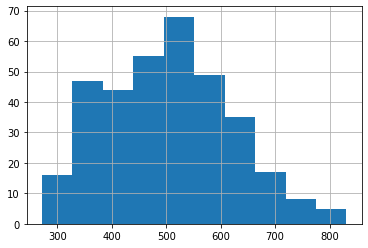

In [ ]:
# Plotando o histograma da variável hom_doloso

df.hom_doloso.hist();

No histograma acima alguns valores já nos chama atenção como por exemplo:
Temos o eixo y para registro dos meses, enquanto o eixo x o número de homícidios dolosos.

* Praticamente mais de 60 meses tiveram 500-550 homícidios dolosos durante o período em estudo.
* Houveram menos de 10 meses ao longo de todos o período que registraram homícidios na casa dos 800.



Nessa etapa de visualização de dados vamos plotar um gráfico de linhas da variável `roubo_em_coletivo`, crime que assola as cidades Brasileiras.


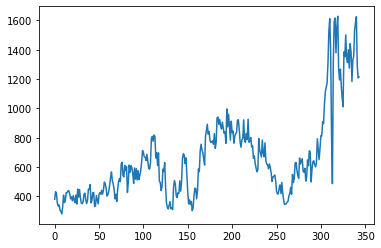

In [ ]:
# Plotar gráfico de linhas da variável roubo_em_coletivo

df.roubo_em_coletivo.plot();

Da forma que fizemos com o histograma o gráfico de linhas também é uma forma de visualização bastante útil.

* Podemos ter a perspectiva de que o máximo valor registrado para roubos em coletivos chegou perto de 1600 em um mês já o mínimo chegou a ser abaixo dos 400.

## Conclusão

Esse projeto foi realizado utilizando dados públicos do Portal ISP Dados que é fornecido pela segurança pública do Rio de Janeiro. Sendo assim feito com dados reais.

Foi feito a análise do dataset como a quantidade de variáveis e entradas que possuem sendo 56 variáveis e 344 entradas.

Fizemos também uma análise exploratória de dados, verificando os dados ausentes, o tipo das variáveis, valores estátisticos com o metódo `describe`, resultados de roubos de veículos e crimes contra a vida e por último plotagem de duas variáveis para análise.

Com isso chegamos a conclusão que o processo de EDA ( Análise Exploratória de Dados) foi realizado. Storytelling feito de acordo com a premissa do projeto e os resultados abordados para possíveis conclusões acerca dos crimes realizados na cidade do Rio de Janeiro.